# Create ratemaps 
Jump to the bottom of the notebook for the generation of rate maps

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import os
import expipe
import pathlib
import numpy as np
import place_stimulation as ps
import neo
import quantities as pq
import matplotlib.pylab as plt

par = {'speed_filter': 0.3, # m/s
       'pos_fs': 60 ,
       'f_cut': 1,
       'spat_binsize': 0.02 ,
       'spat_smoothing': 0.025,
       'grid_stepsize': 0.1 ,
       'box_xlen': 1 ,
       'box_ylen': 1 ,
       'spike_size': 10,
       'field_max_wall_extent':0.1,
       'field_min_bins':12
}
%matplotlib notebook

# Load project in python using expipe

In [3]:
project_path = "/home/alessiob/Documents/Codes/expipe-project/projects/8-track-stim"
project = expipe.get_project(project_path)
actions = project.actions

In [4]:
actions

In [5]:
action = actions['MBR-0006-060519-1']

In [6]:
data_path = ps.get_data_path(action)

Project path: /home/alessiob/Documents/Codes/expipe-project/projects/8-track-stim
Data path: actions/MBR-0006-060519-1/data/main.exdir


In [10]:
# For Intan recording and Open Ephys tracking clip spiketrains, epochs (stimulation triggers) using:
# - digital input evet used for sync in intan (available in main.exdir/epochs/intan-events/digital-in-0 (or 1))
# and Open Ephys tracking using:
# - sync event form open-ephys (available in main.exdir/epochs/open-ephys-events/sync_...)

In [72]:
sptr = ps.load_spiketrains(data_path, load_waveforms=True)

In [17]:
sptr

[SpikeTrain, SpikeTrain]

In [94]:
# select red here
x, y, t, speed = ps.load_tracking(data_path, interp=False, fc=3*pq.Hz)

[1.32425680e-02 8.07859628e-02 1.47283546e-01 ... 3.35648379e+02
 3.35714823e+02 3.35782316e+02] dimensionless 1.0 dimensionless
3.0 Hz 14.134714522077617 dimensionless
Removed 0.23172530018959345 % of tracking samples


<IPython.core.display.Javascript object>


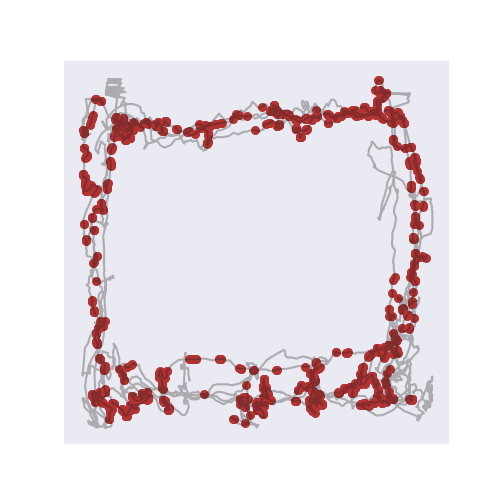

In [86]:
ps.plot_path(x, y, t, sptr[0])

<IPython.core.display.Javascript object>


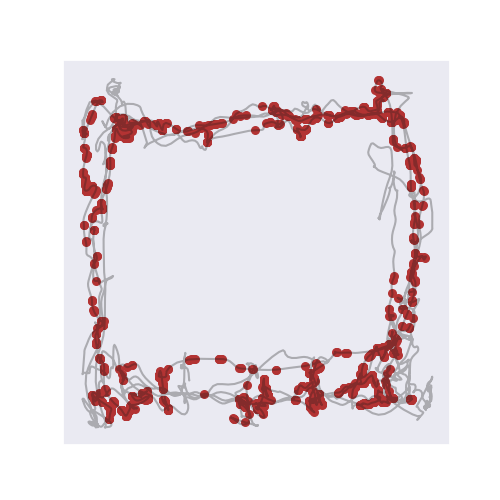

In [90]:
ps.plot_path(x, y, t, sptr[0])

<IPython.core.display.Javascript object>


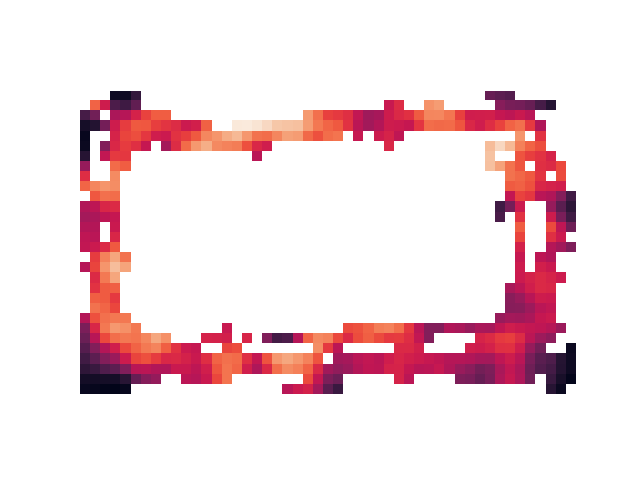

(-0.5, 48.5, -0.5, 29.5)

In [92]:
ax = ps.plot_rate_map(x, y, t, sptr[1], boxsize=[np.max(y), np.max(x)])
ax.axis('off')

<IPython.core.display.Javascript object>


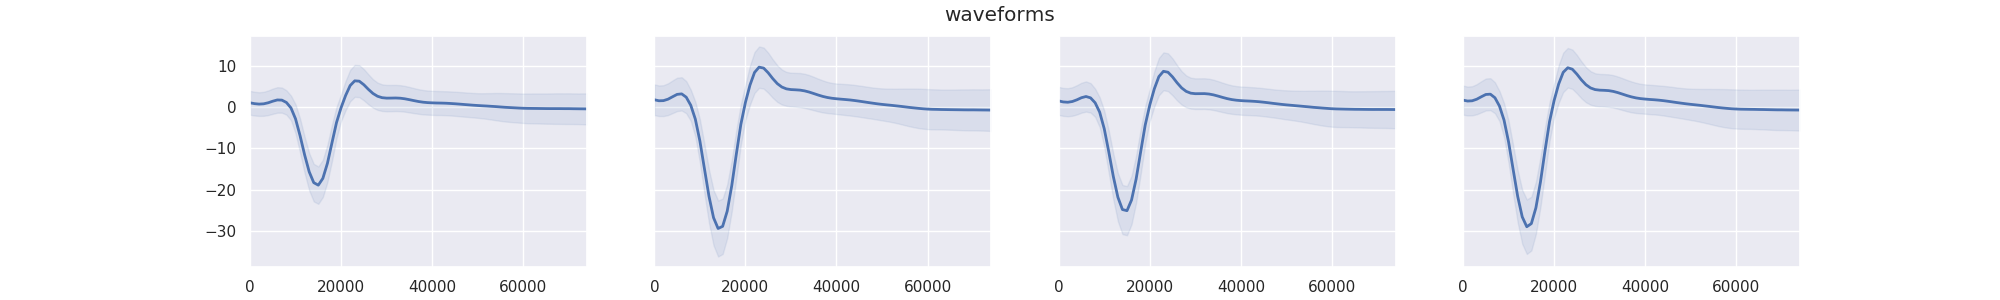

In [80]:
_ = ps.plot_waveforms(sptr[1])

In [68]:
epochs = ps.load_epochs(data_path)

<IPython.core.display.Javascript object>


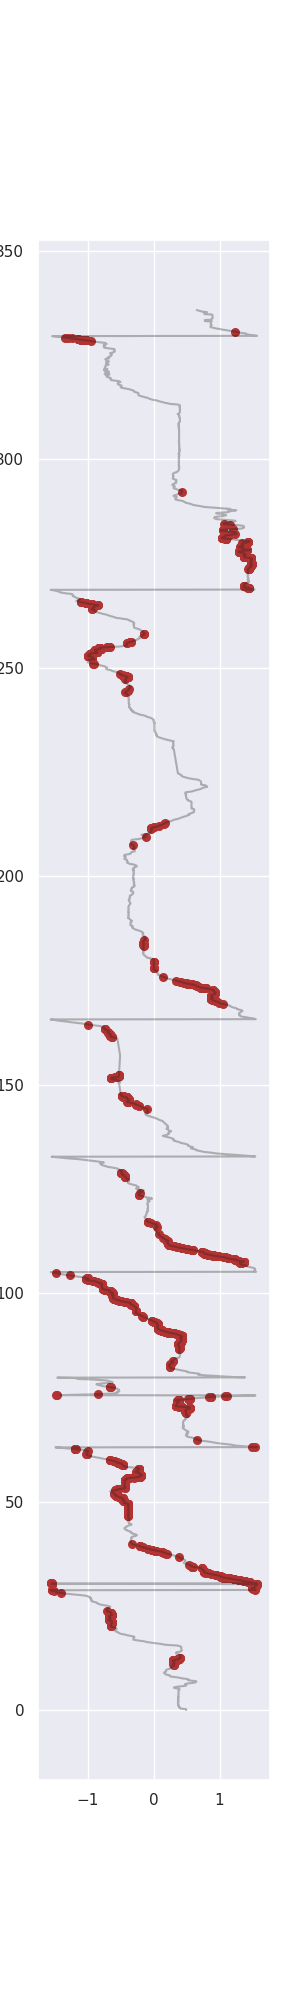

In [95]:
ps.plot_split_path(x, y, t, sptr[0])

In [69]:
# extract relevalt epoch e.g.
epc = epochs[0]

IndexError: list index out of range

In [ ]:
ps.plot_psth(sptr[0], epc, bin_size=0.1 * pq.s)

In [ ]:
plt.plot(x)